![](https://i.imgur.com/nagCao6.jpg)

Photo by Matt Chesin on Unsplash

# Index

We’ll be using Machine Learning to predict whether a Pima Indian Women has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc. 

This notebook walks through the various stages of the data science workflow. In particular, the notebook has the following sections:


<ol>
  <li>Introduction</li>
  <li>Exploratory Data Analysis (EDA) and Statistical Analysis</li>
  <li>Prediction</li>
  <li>Model Performance Analysis</li>
  <li>Conclusion</li>
</ol>

# Introduction

Actually it was a question for many scientists why so many Pima Indian Women suffer from diabetes in relation to other ethnicities.

The study was carried out by scientists to investigate the significance of health-related predictors of diabetes in **Pima Indians Women**. The study population was the females 21 years and above of Pima Indian heritage patients of diabetes and digestive and kidney diseases. 

The research question was: what are the health predictions that associated with the presence of diabetes in Pima Indians? 

The study aimed at testing the significance of health-related predictors of diabetes in Pima Indians women. That was according to World Health Organization criteria (i.e. if the 2-hour post-load plasma glucose was at least 200 mg/dl at any survey examination or if found during routine medical care). A total of 768 women were registered in the database.

So, here we have to find out why so many Pima Indian Women suffer from diabetes in relation to other ethnicities?

To find the reason behind this, we have to find whether there is a relationship between the numbers of times a women was pregnant and the BMIs of Pima Indian Women older than 21 years old, or whether the women have diabetes and their diabetes pedigree function (a function that represents how likely they are to get the disease by extrapolating from their ancestor’s history).

So lets start the analysis, but before that, I think we should understand our dataset and good to have basic knowledge of diabetes also.


### What is Diabetes?

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

### What is Gestational Diabetes?
Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes. Gestational diabetes causes high blood sugar that can affect the pregnancy and the baby’s health. 

Results indicate that the highest prevalence of diabetes is found in high rates in Indian Pima.

So, lets start and try to find out why Pima Indians Women have higher rate of diabetes.

## Exploratory Data Analysis (EDA) and Statistical Analysis

## Import Libraries

In [1]:
#from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
diabetes_data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
# View top 5 rows of our dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Identification of variables and data types

In [4]:
diabetes_data.shape

(768, 9)

Dataset comprises of 768 observations and 9 fields.

The following features have been provided to help us predict whether a person is diabetic or not:

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test. Less than 140 mg/dL is considered normal level of glucose.
* **BloodPressure:** Diastolic blood pressure (mm Hg). 120/80 is normal BP level for female above 18 yr old.
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml). 16-166 mIU/L is considered the normal level of insulin.
* **BMI:** Body mass index (weight in kg/(height in m)2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* **Age:** Age (years)
* **Outcome:** Class variable (0 if non-diabetic, 1 if diabetic)


Let’s also make sure that our data is clean (has no null values, etc).

In [5]:
## Lets check data types,columns names, null value counts, memory usage etc
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Get the details of each column
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Missing Value Treatment

Missing data in the data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

**By analysing the above details of the dataset found that few features have zero values and pregnancy variable has maximum = 17 which seems to be impossible.**

These column values of zero do not make sense as there is some range for a normal healthy human being which is certainly not the zero and thus indicates a missing value.

Below variables have an invalid zero value:
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

**Initially we will replace these zeros with NaN so that it will easy to count the missing values. Then, later on, we will replace them with appropriate values.**

In [7]:
diabetes_data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

Let us see distribution and also boxplot for outliers of feature "Pregnancies".

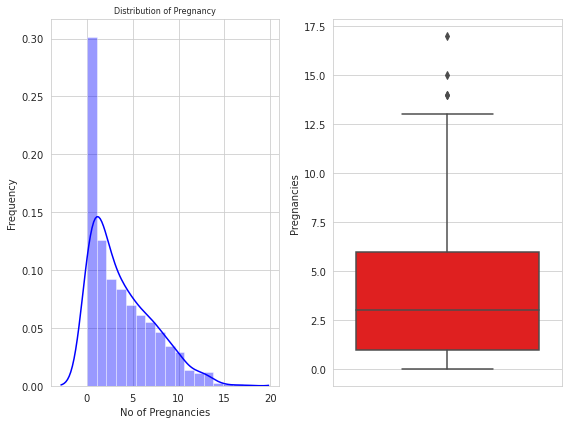

In [8]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (8,6))

plot00=sns.distplot(diabetes_data['Pregnancies'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('No of Pregnancies')
axes[0].set_ylabel('Frequency')
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=diabetes_data,ax=axes[1],orient = 'v', color='r')
plt.tight_layout()

In [9]:
# Replace zeros with NaN
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [10]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Missing values counts

In [11]:
total = diabetes_data.isnull().sum().sort_values(ascending=False)
percent = ((diabetes_data.isnull().sum()/diabetes_data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(9)

,Total,Percent
Insulin,374,48.697917
SkinThickness,227,29.557292
BloodPressure,35,4.557292
BMI,11,1.432292
Glucose,5,0.651042
Outcome,0,0.000000
Age,0,0.000000
DiabetesPedigreeFunction,0,0.000000
Pregnancies,0,0.000000


Text(0.5, 1.0, 'Percent missing data by feature')

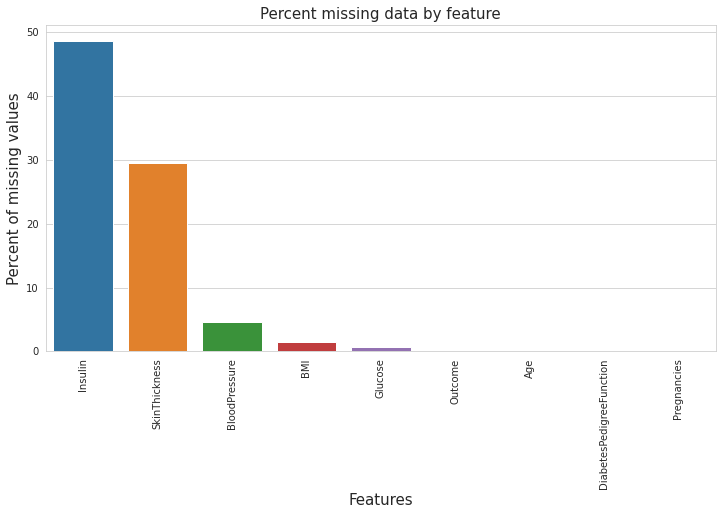

In [12]:
f, ax = plt.subplots(figsize=(12, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* Insulin has 374 missing values which is about 48.7% of total missing values.
* SkinThickness has 227 missing values which is only 29.6% of total missing values.
* BloodPressure has 35 missing values which is only 4.6% of total missing values.
* BMI has only 11 missing values which is only 1.4% of total missing values.

## Understand Data Distribution

The proportion of Insulin missing data are likely very high and this field seems to be very important to know wheather a person is diabetic or not, so we will replace the missing values with some form of imputation. So lets find the relationship between the field for better imputation of missing values.

## Pearson's Correlation Coefficient or simply Correlation

Pearson's Correlation Coefficient helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colours. Here Heat Map can help us to visualize the correlation information between colums.

In [13]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


### Heatmap to find correlation 

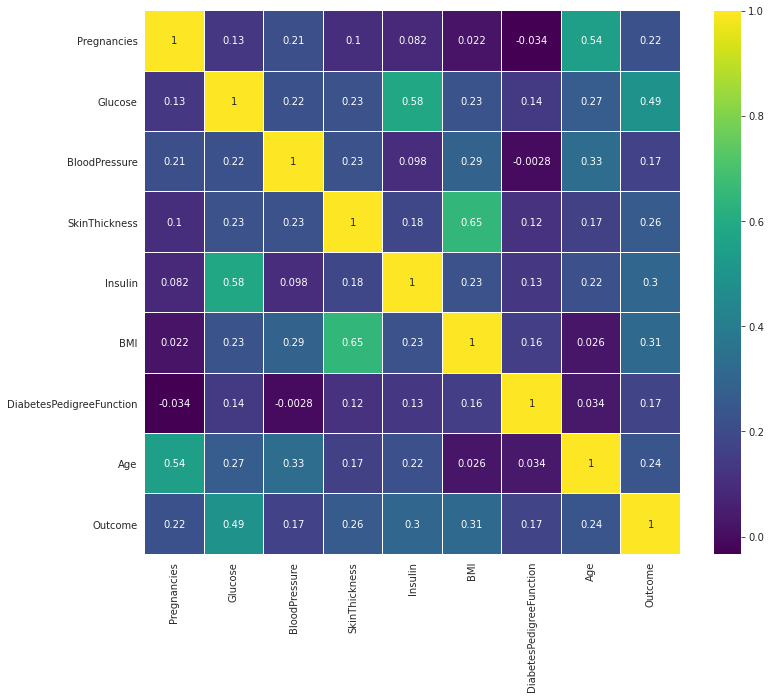

In [14]:
plt.figure(figsize=(12,10))  
# sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')
sns.heatmap(diabetes_data.corr(),annot=True, cmap='viridis',linewidths=.1)
plt.show()

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* It seems that Insulin is highly correlated with Glucose (about 0.58), BMI (about 0.23) and Age (about 0.22). It means that as the values of glucose, BMI and Age increase, the insuline is also increasing. It seems logical also that fat and aged people might have high level of insuline in their bodies.
* In the same way SkinThickness is highly correlated with BMI (about 0.65).

### Impute NaN values of columns according to their distribution

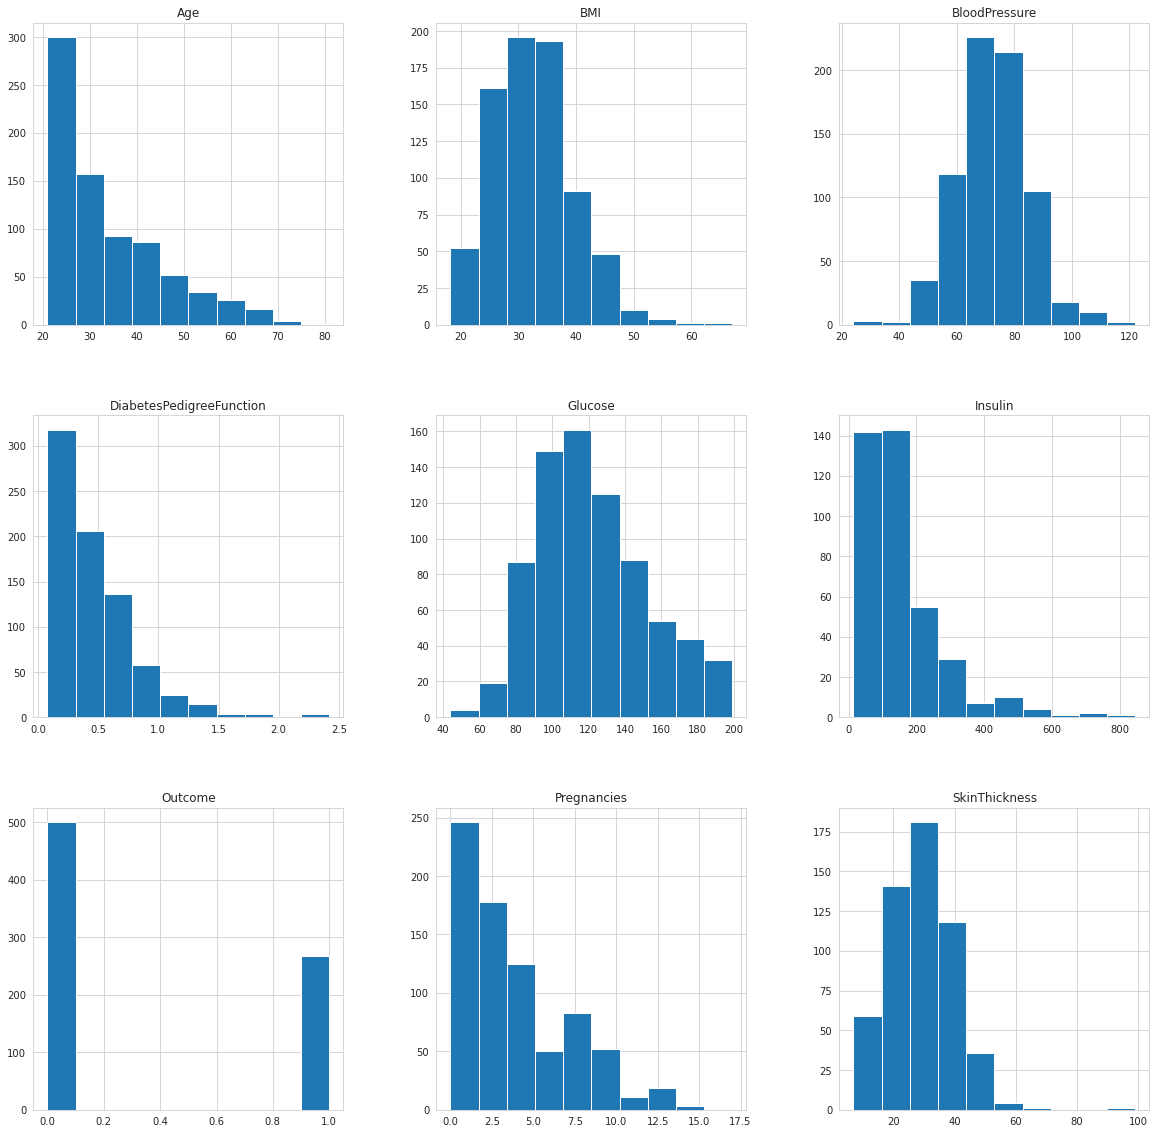

In [15]:
# Check the distribution of each column, so that we can find wich is best central tendency (mean, medium or mode) to replace missing values:
diabetes_data.hist(figsize = (20,20))
plt.show()

<p style="font-weight: bold;color:#FF4500">Highlights</p>
Distribution graph show that glucose & BloodPressure columns are almost normally distributed where as SkinThickness, Insulin and BMI are positive skewned.

So we will replace the missing values according to their distribution.

In [16]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

## Plotting after NaN removal 

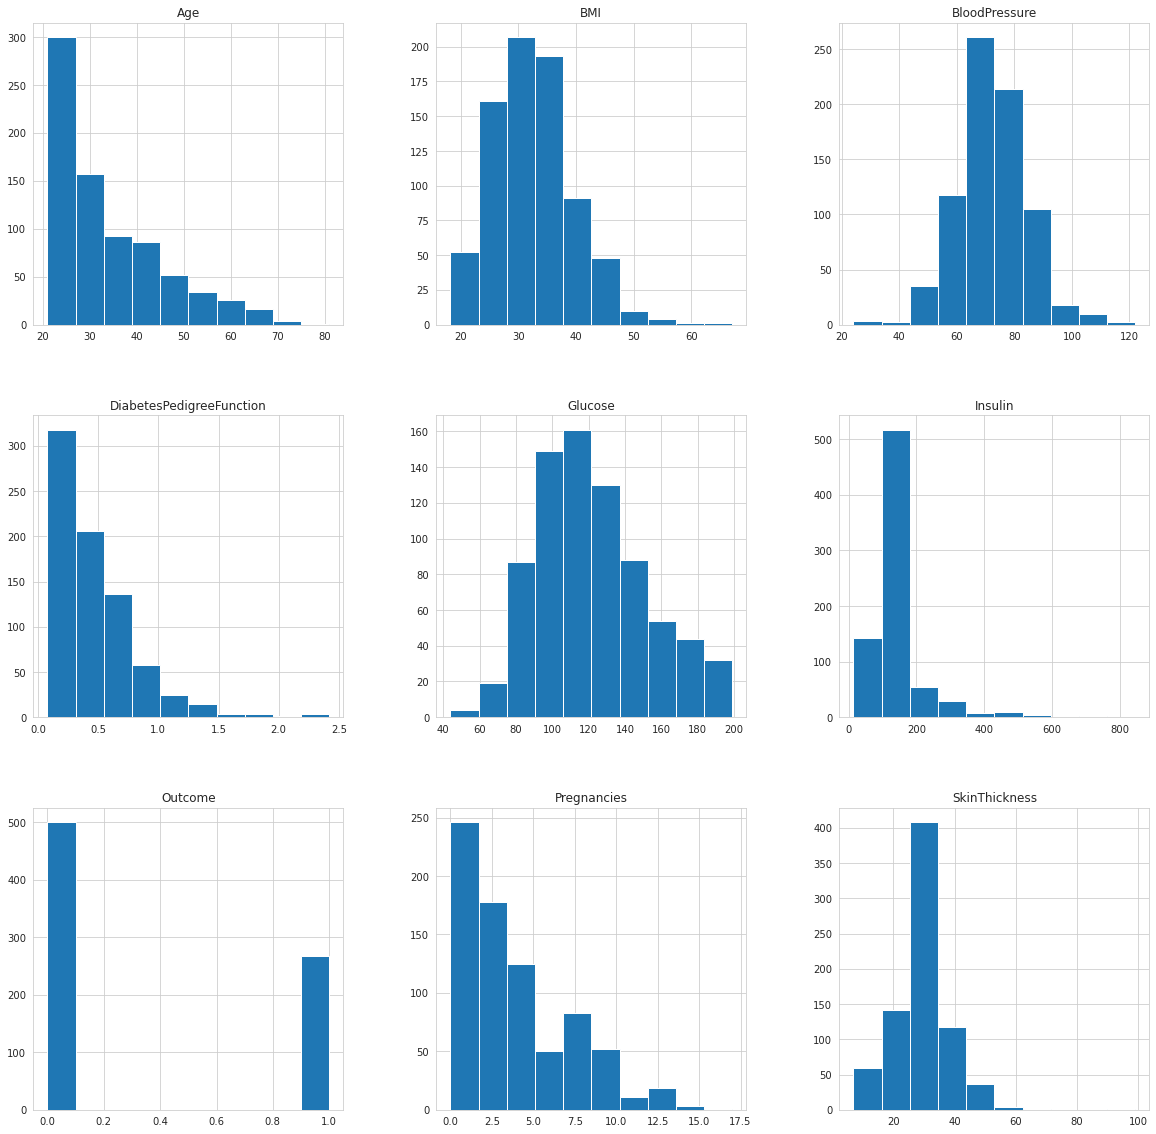

In [17]:
diabetes_data.hist(figsize = (20,20))
plt.show()

## Checking  balance of data

We can produce a seaborn count plot to see how the output is dominated by one of the classes or not.

0    500
1    268
Name: Outcome, dtype: int64


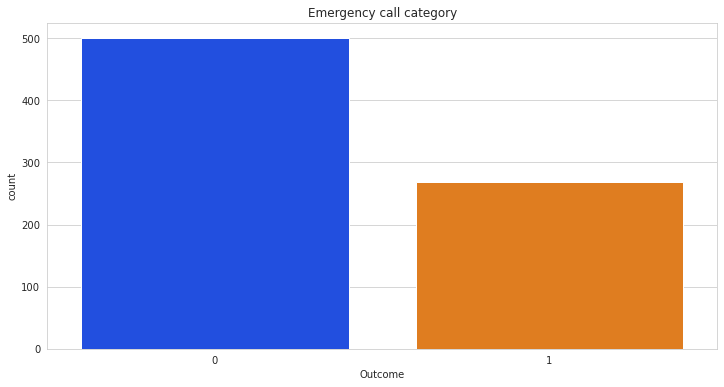

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=diabetes_data, palette='bright')
plt.title("Emergency call category")

print(diabetes_data['Outcome'].value_counts())

<p style="font-weight: bold;color:#FF4500">Highlights</p>
A total of 768 women were registered in the database. 268 womens about 35% were having diabetes, while 500 women about 65% were not. 

The above graph shows that the dataset is biased towards non-diabetic patient. The number of non-diabetics is almost twice the number of diabetic patients.

## Scatter matrix of data

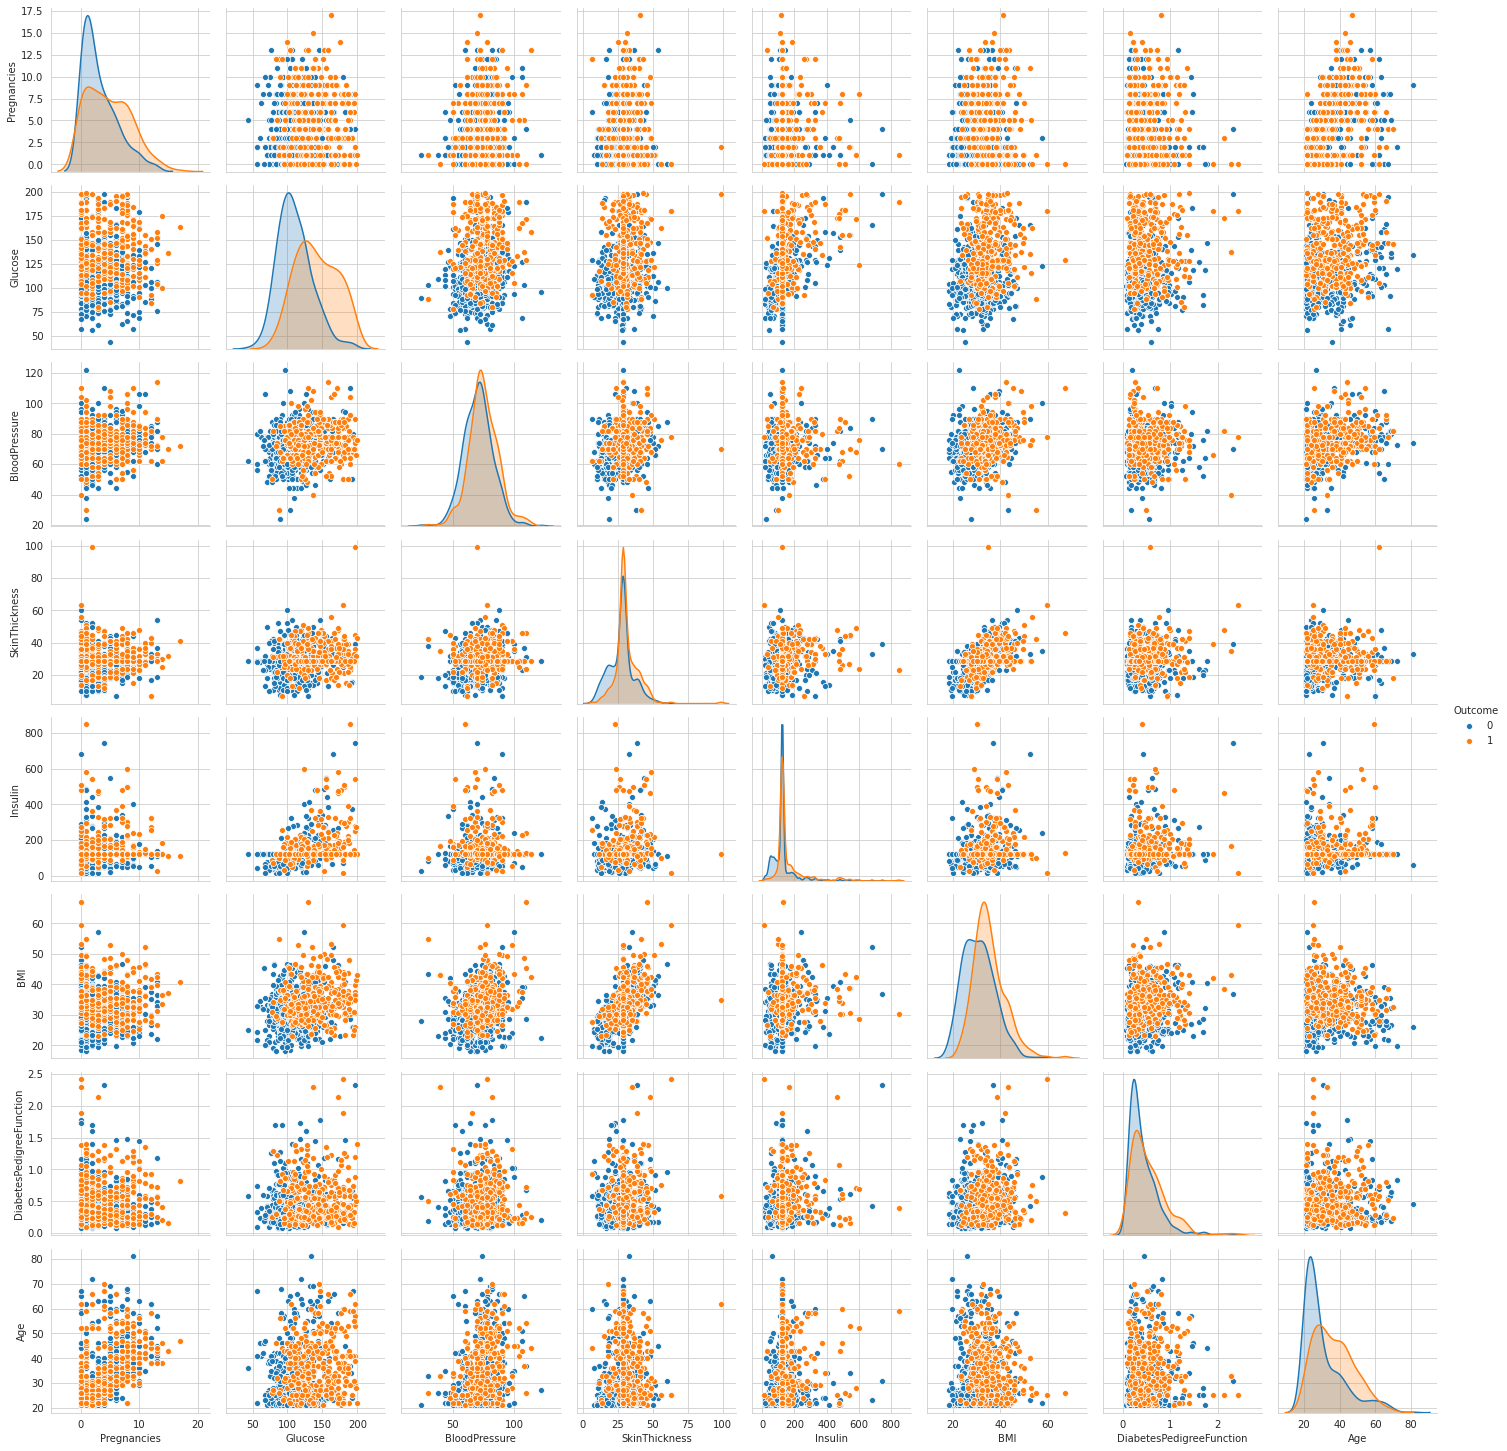

In [19]:
sns.pairplot(diabetes_data,hue='Outcome')

<p style="font-weight: bold;color:#FF4500">Highlights</p>
The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

## BMI vs Pregnancy vs Diabetes

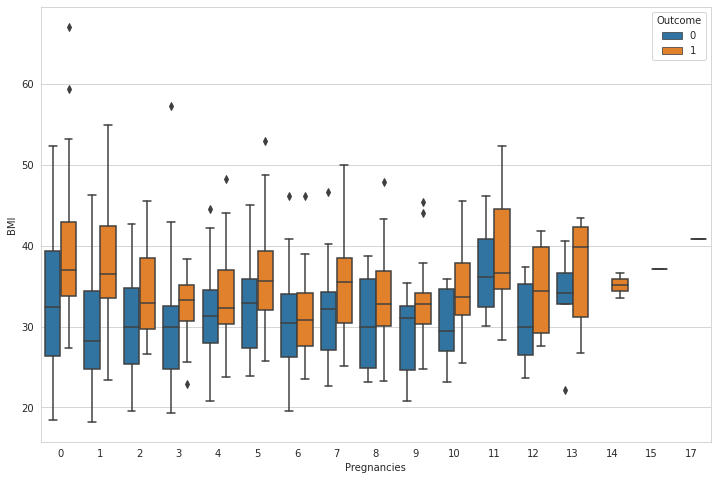

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pregnancies', y='BMI',data=diabetes_data, hue='Outcome')

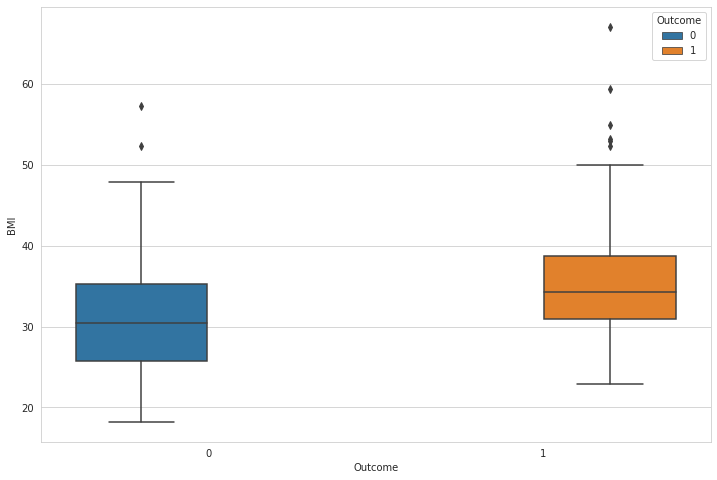

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=diabetes_data, hue='Outcome')

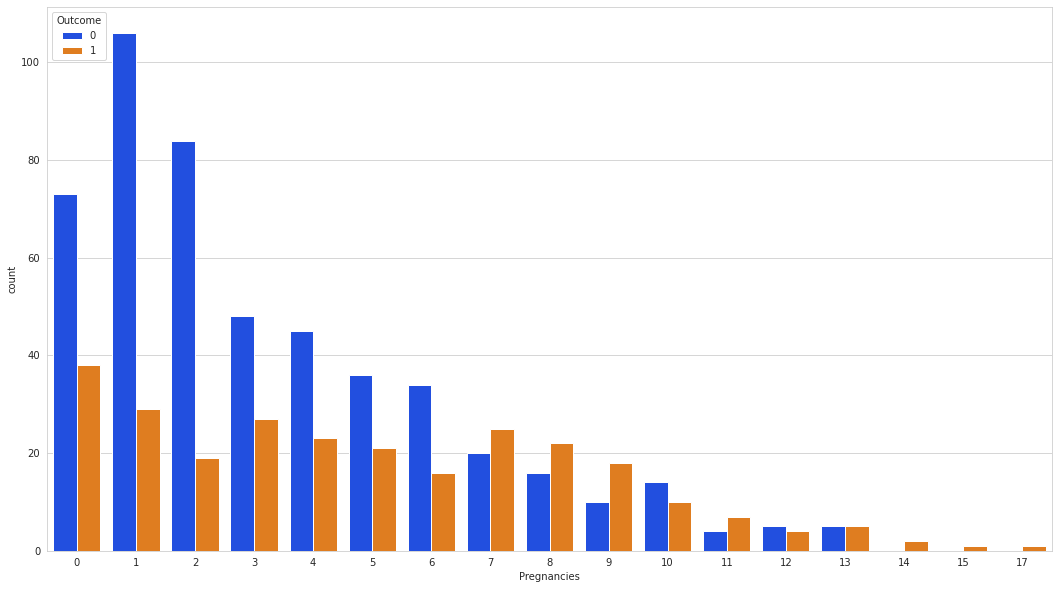

In [22]:
plt.figure(figsize=(18,10))
sns.countplot(x='Pregnancies',data=diabetes_data,hue = 'Outcome', palette='bright')

<p style="font-weight: bold;color:#FF4500">Highlights</p>

It is surprising that the median BMI does not immensely change as the number of pregnancies increases. I expected there to be a strong positive relationship between the number of pregnancies and the BMI. Those who tested positive for diabetes had higher BMIs than those who does not; yet, not a larger difference between the medians.

BMI will generally be higher for women who have had more numbers of pregnancy as well as for those who test positive for diabetes and that the relationship between the pedigree function and the test results will show that those who had a higher pedigree function tested positive and those who had a lower pedigree function tested negative.

## Pedigree function vs Diabetes 

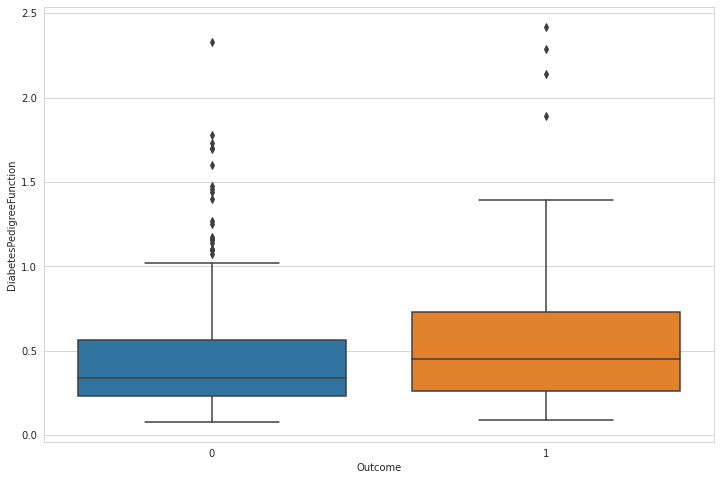

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction',data=diabetes_data)

<p style="font-weight: bold;color:#FF4500">Highlights</p>
This graph more clearly shows the relationship between the pedigree function and the test results that the women got for diabetes. Since those who tested positive have a higher median and more high outliers, it is clear that the pedigree function does in fact, accurately help estimate the test results for diabetes. It shows that diabetes does follow genetics so those whose ancestors suffered from it have a higher risk of getting the disease themselves as well. Both test results show many outliers yet the outliers for those who tested negative seem to be lower pedigree functions than those who tested positive. This concluded that the genetic component is likely to contribute more to the emergence of diabetes in the Pima Indians and their offspring.

## Pregnancy vs Diabetes

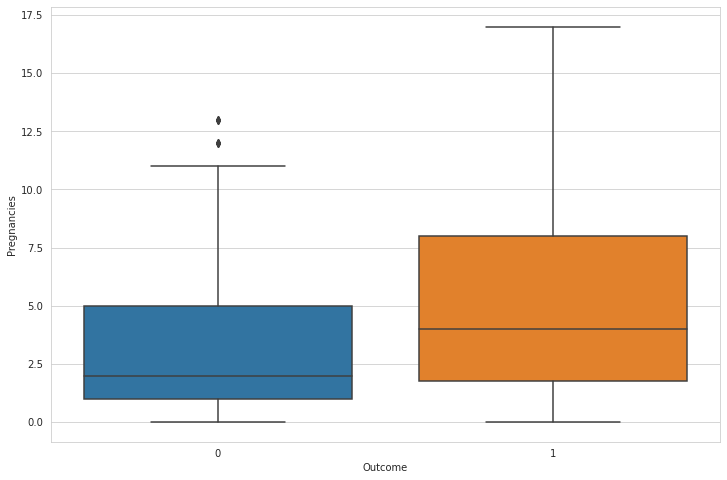

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='Pregnancies',data=diabetes_data)

<p style="font-weight: bold;color:#FF4500">Highlights</p>
The average number of pregnancies is higher (4.9) in diabetic in comparing to (3.3) in non-diabetic women with a significant difference between them.

## BMI vs Diabetes

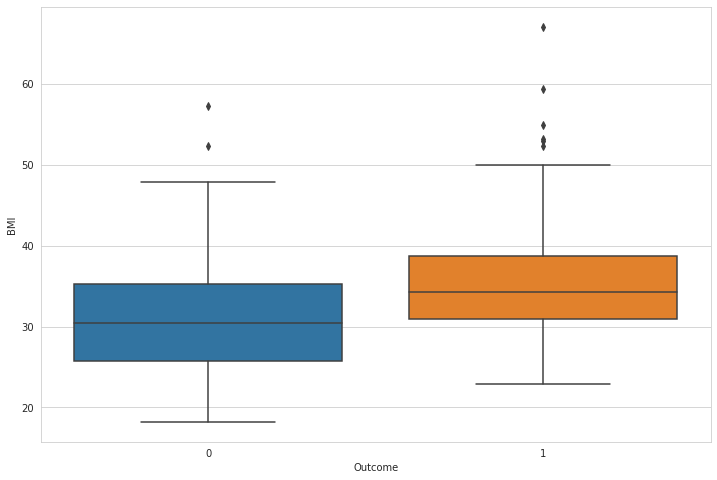

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=diabetes_data)

## Diabetic in Normal BMI

Let try to find out how is the probabiliy of having diabetic in a women having normal BMI. Please note that the range of noraml BMI is 18.5 to 25.

In [26]:
normalBMIData = diabetes_data[(diabetes_data['BMI'] >= 18.5) & (diabetes_data['BMI'] <= 25)]
normalBMIData['Outcome'].value_counts()

0    101
1      7
Name: Outcome, dtype: int64

In [27]:
notNormalBMIData = diabetes_data[(diabetes_data['BMI'] < 18.5) | (diabetes_data['BMI'] > 25)]
notNormalBMIData['Outcome'].value_counts()

0    399
1    261
Name: Outcome, dtype: int64

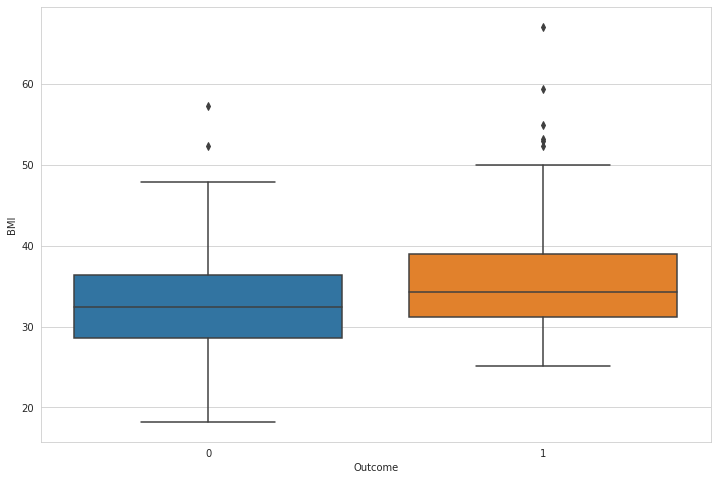

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='BMI',data=notNormalBMIData)

<p style="font-weight: bold;color:#FF4500">Highlights</p>

The Body Mass Index (BMI) showed a significant association with the occurrence of diabetes and that even the normal weighted women were at almost 9 times risk of being diabetic in comparison to the overweight.

In addition, the interquartile range for the women who tested positive reaches a higher BMI than the IQR for those who tested negative. Therefore, women could have higher BMIs and not be outliers if they tested positive as opposed to negative, showing that more women who tested positive did, in fact, have higher BMIs than those who tested negative. 

Please find BMI range on [google](https://www.vertex42.com/ExcelTemplates/bmi-chart.html).

## Age vs Diabetes

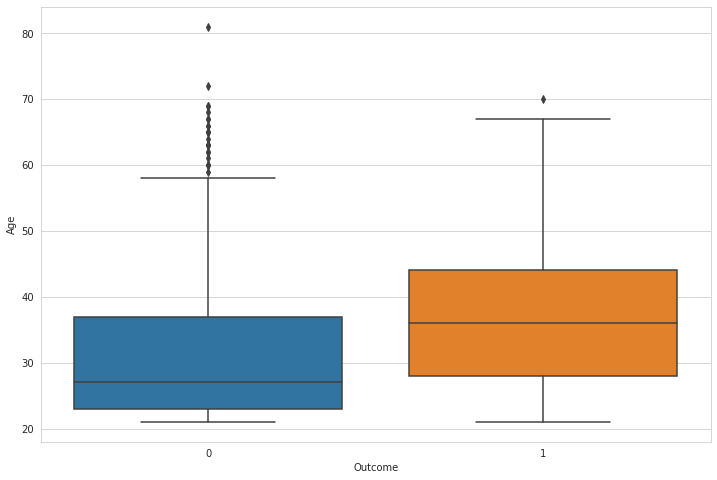

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Outcome', y='Age',data=diabetes_data)

In [30]:
diabetes_data['Age'].value_counts().head()

22    72
21    63
25    48
24    46
23    38
Name: Age, dtype: int64

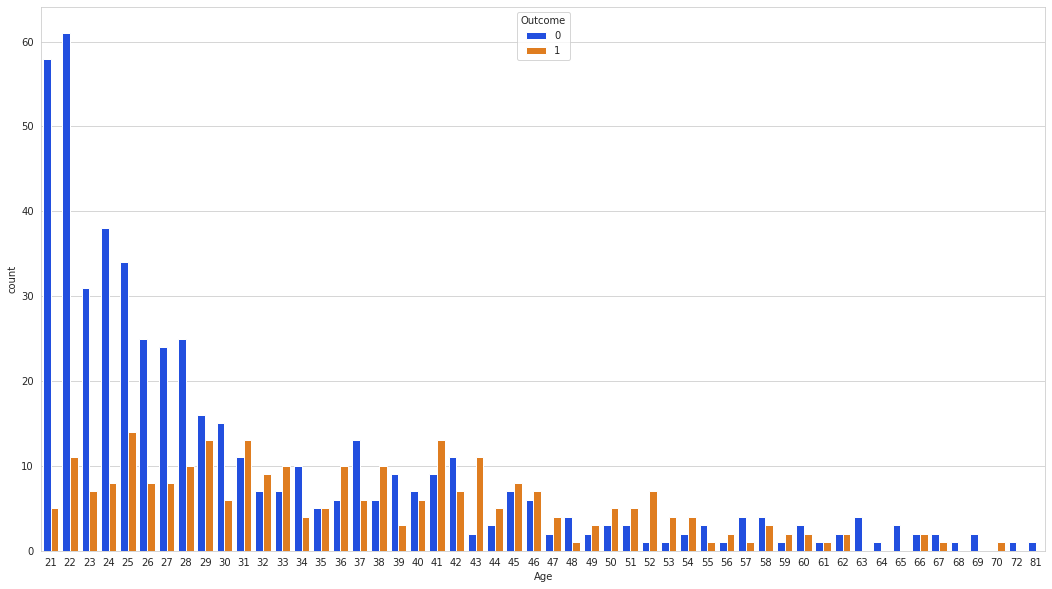

In [31]:
plt.figure(figsize=(18,10))
sns.countplot(x='Age',data=diabetes_data,hue = 'Outcome', palette='bright')

<p style="font-weight: bold;color:#FF4500">Highlights</p>
Significant relation can be seen between the age distribution and diabetic occurrence. Women at age group > 31 years were at higher risk to contract diabetes in comparison to the younger age group.

# Prediction using KNN

KNN-classifier can be used when your data set is small enough.

https://scikit-learn.org/stable/tutorial/machine_learning_map/

## Standardize the Variables
Standardization (also called z-score normalization) is the process of putting different variables on the same scale. Standardization transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1. 

$$ Z = {X - \mu \over \sigma}$$ 


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
scaler.fit(diabetes_data.drop('Outcome',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaled_features = scaler.transform(diabetes_data.drop('Outcome',axis=1))

#### Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

In [35]:
df_feat = pd.DataFrame(scaled_features,columns=diabetes_data.columns[:-1])

In [36]:
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,diabetes_data['Outcome'],
                                                    test_size=0.30,random_state=101)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model instance with n_neighbors=1

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**`

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [42]:
pred = knn.predict(X_test)

### Create a confusion matrix and classification report.

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(confusion_matrix(y_test,pred))

[[115  35]
 [ 29  52]]


In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       150
           1       0.60      0.64      0.62        81

    accuracy                           0.72       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.72      0.73       231



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [46]:
error_rate = []
test_scores = []
train_scores = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

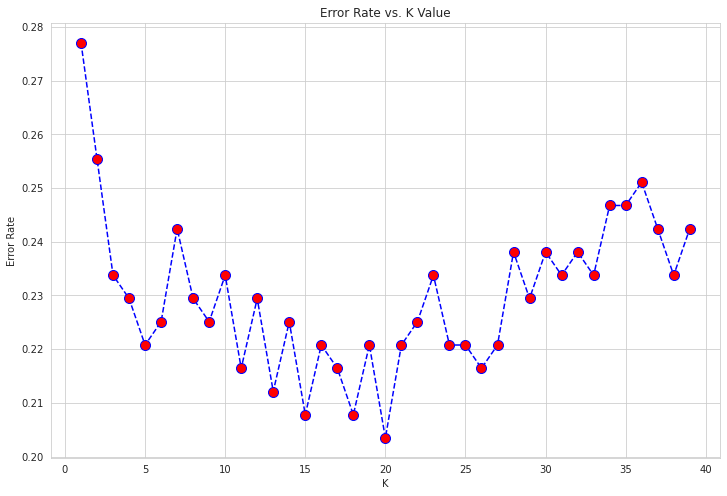

In [47]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [48]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [49]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.65367965367966 % and k = [20]


## Retrain with new K Value

**Retrain your model with the best K value and re-do the classification report and the confusion matrix.**

In [50]:
# NOW WITH K=20
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=20


[[134  16]
 [ 31  50]]


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.76      0.62      0.68        81

    accuracy                           0.80       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



# Result Visualisation

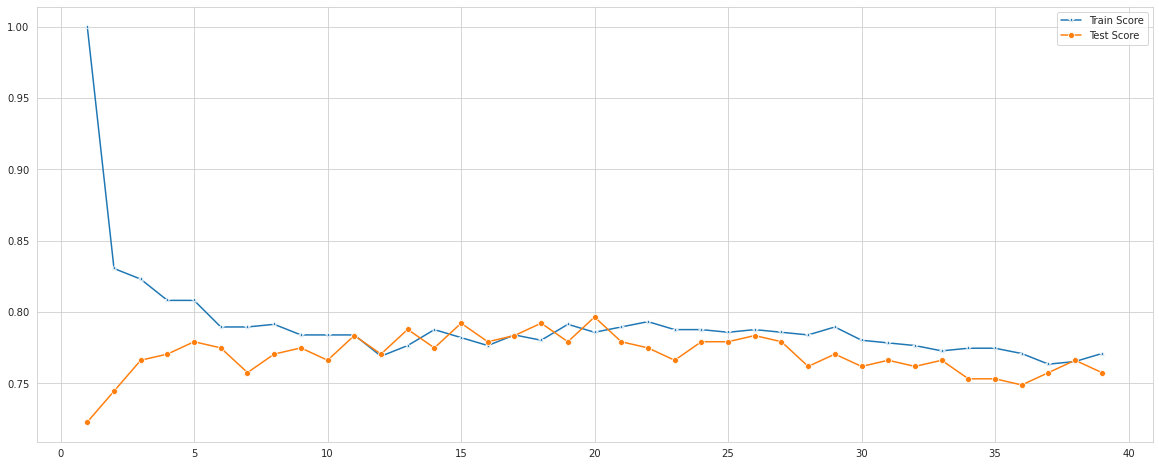

In [51]:
plt.figure(figsize=(20,8))
sns.lineplot(range(1,40),train_scores,marker='*',label='Train Score')
sns.lineplot(range(1,40),test_scores,marker='o',label='Test Score')

#### The best result is captured at k = 20 hence 20 is used for the final model

In [52]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(20)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7965367965367965

# Model Performance Analysis

## Confusion Matrix

The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.


In [53]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [54]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,134,16,150
1,31,50,81
All,165,66,231


Text(0.5, 15.0, 'Predicted label')

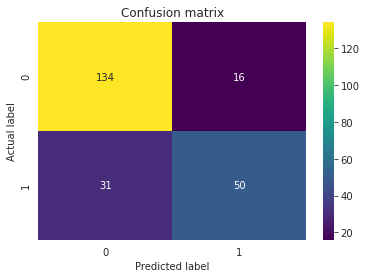

In [55]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Classification Report

Report which includes Precision, Recall and F1-Score.

### Precision Score
**Precision** – Accuracy of positive predictions.
$$ Precision = {TP \over (TP + FP)}$$ 
        
### Recall Score
**Recall(sensitivity or true positive rate)**: Fraction of positives that were correctly identified.
$$ Recall = {TP \over (TP + FN)}$$ 
        
### F1 Score
**F1 Score** – A helpful metric for comparing two classifiers. F1 Score takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.
$$ F1 = 2 \times {(precision \times recall) \over (precision + recall)}$$ 

In [56]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.76      0.62      0.68        81

    accuracy                           0.80       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



In [57]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Printing the Overall Accuracy of the model
print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the model : 0.797


## ROC - AUC

In a Receiver Operating Characteristic (ROC) curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. A test with perfect discrimination (no overlap in the two distributions) has a ROC curve that passes through the upper left corner (100% sensitivity, 100% specificity). Therefore the closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test.

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

* The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 
* It is a comparison of two operating characteristics (TPR and FPR) as the criterion changes.
* The TPR defines how many correct positive results occur among all positive samples available during the test. 
* The FPR defines how many incorrect positive results occur among all negative samples available during the test.
* What is a good ROC value? A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system": .90-1 = excellent (A) .80-.90 = good (B) .70-.80 = fair (C) .60-.70 = poor (D)


In [58]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

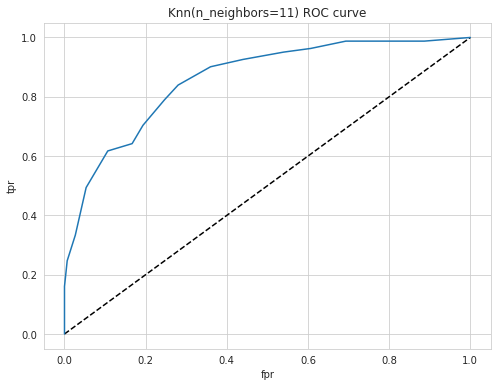

In [59]:
plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [60]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8589711934156379

# Conclusion

Overall, it seems that there is some form of an association between BMI, number of pregnancies, pedigree function, and the test results for diabetes. It is surprising that the median BMI does not immensely change as the number of pregnancies increases. I expected there to be a strong positive relationship between the number of pregnancies and the BMI. Those who tested positive for diabetes had higher BMIs than those who did not; yet, I predicted a larger difference between the medians.

To find the relationship between the pedigree function and the test results, it would be interesting to also have males and those under 21 as well as 21 in the sample. That way, possible confounding variables such as a hormone that only females have that may cause diabetes, can be eliminated.

## I welcome comments, suggestions, corrections and of course votes also.